Example
---
Suppose that $f(x)=x^4+4x^3$ for $x\in[-4,4]$.
1. critical points:
\begin{eqnarray}\large{f'(x)=0}& \large{\Rightarrow}&\large{4 x^{3} + 12 x^{2}=0 }\cr &\large{\Rightarrow}&\large{4 x^{2} \left(x + 3\right)=0} \cr&\large{\Rightarrow}&\large{ x= \mathtt{\text{ -3, 0,}}}\end{eqnarray}
2. Monotonicity:
 - $f'>0\Rightarrow f$ increasion: for $x\in(-3,4)$.
 - $f'<0\Rightarrow f$ decreasion: for $x\in(-4,-3)$.
3.  $\large{f''(x)=12 x^{2} + 24 x=12 x \left(x + 2\right)}$
4. Concavity:
 - $f''(x)>0\Rightarrow f$ concave upwards: $x\in(-4,-2)\cup(0,4)$;
 - $f''(x)<0\Rightarrow f$ concave downwards: $x\in(-2,0)$;
5. Extrema: Compare the function values at the critical points and boundary points: $x=-4,-3,0,4$:
$$ f(-4)=0,f(-3)=-27,f(0)=0,f(4)=512$$.
Therefor, Maximum = $512$, Minimum = $-27$.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

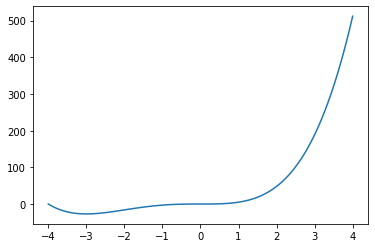

In [14]:
x= np.linspace(-4,4,101)
plt.plot(x,x**4+4*x**3)

In [13]:
# Symbolic computation with  Latex Output
from IPython.display import HTML,Latex
from sympy import symbols,pprint,integrate,diff,latex,limit,simplify,Matrix,Abs,Ei,Ne,solve,Function,fraction
from sympy import pi,sqrt,sin,cos,log,tan,cot,sec,csc,exp,oo,E,tan,Piecewise,asin,atan,erf,erfc,E
from sympy import solveset,cancel,factor,S,Interval
from sympy.solvers.inequalities import solve_univariate_inequality

x=symbols("x",real=True)

# find critical values

def Criticals(f_,x_,rational=False,BC=[]):
    """
    Criticals(f_,x_,rational=False)
    Inputs
       f_: function
       x_: variable
       rational: False (or True)
                 whether rational function is computered here  
    Output
       critical values (list)
    """
    f=f_
    x=x_
    text="Functions:  $$\large{\quad f(x) = %s}$$" %(latex(f_))
    
    if rational:
       d1= simplify(cancel(diff(f_,x_)))
       n,d= fraction(d1)
       sols=solve(n,x_)+solve(d,x_)
    else:
       d1=diff(f_,x_)
       
       sols=solve(d1,x_)
    
    sols=sols+BC
    sols.sort()
    print("Critical Points of f(x)=%s: %s " %(f_,sols))
         
    return  sols

def extrema_BI(f_,x_,c_):
    """
    extrema_BI(f_,c_)
    Input:
       f_: function
       x_: variable
       c_: list of critical values
    Print out possible minimum and maximum
    """
    p_=[]
    text="<big>Extrema of $\large{%s}$:" %(latex((f_)))
    #print("Extrema of {}\n---".format(latex((f_))))
    text=text+"<br>---<br>"
    for c in c_:
        pval=f_.subs({x_:c})
        #print("at x={}, f(x)={}".format(c,pval))
        text=text+" $$\large{\circ \quad f(x)=%s \\text{ at }x=%s}$$" %(latex(pval),latex(c))                    
        p_.append(pval)
        #print(p_)
    text=text+"<br>---<br>"    
    text=text+"Maximum is $\large{%s}$, and Minimum is $\large{%s}$. " %(latex(max(p_)),latex(min(p_)))
    #print("---\nMaximum is {}, and Minimum is {}".format(max(p_),min(p_))) 
    return HTML(text)

# diff_app
def diff_app(f_,x_,rational=False,BC=[]):
    """
    diff_app(f_,x_,rational=False)
    Inputs
       f_: function
       x_: variable
       rational: False (or True)
                 whether rational function is computered here  
    Print out
       f',f'', critical values, monotonicity and concavity
    """
    f=f_
    x=x_
    if (BC==[]):
       text="Functions:  $$\large{\quad f(x) = %s}$$" %(latex(f_))
    else:
       text="Functions:  $$\large{\quad f(x) = %s\\text{ on } [%s,%s]}$$" %(latex(f_),latex(BC[0]),latex(BC[1])) 
    
    if rational:
       d1= simplify(cancel(diff(f_,x_)))
       n,d= fraction(d1)
       sols=solve(n,x_)+solve(d,x_)
       d22=simplify(cancel(diff(f_,x_,2)))
       n_,d_=fraction(cancel(diff(f_,x_,2)))
        
       d2=cancel(n_*d_)
    else:
       d1=diff(f_,x_)
       d2=diff(f_,x_,2)
       d22= diff(f_,x_,2)
       sols=solve(diff(f_,x_),x_)
    
    
    text=text+"1. Critical Points: "
    
    if (len(sols)>0):
       criticals=""
       sols.sort()
       for sol in sols:
          criticals=criticals+" %s," %latex(sol)
  
    # Critical points
    if (len(sols)>0):
           #for sol in sols: 
           text=text+"\\begin{eqnarray}"
           text=text+ \
                "\large{f'(x)=0}& \large{\Rightarrow}&\large{%s=0 }\cr" %(latex(d1))
           d11=factor(d1)
           text=text+ \
                " &\large{\Rightarrow}&\large{%s=0} \cr" %(latex(d11))            
           text=text+ \
                "&\large{\Rightarrow}&\large{ x= %s}" %(latex(criticals))
           #text=text+" $%s$," %latex(sols )
           text=text+"\end{eqnarray}"
    else:
      text=text+"$$\large{f'=%s=0\Rightarrow\\text{ no critical point exists.}}$$" %latex(d1)
    
    
    text=text+"$$\large{f''(x)=%s=%s}$$" %(latex(diff(d1,x_)),latex(factor(d22)))
    # Monotoncity
    
    if (solve(diff(f_,x_)>0)!=[]):
       if BC!=[]:
          domain = Interval(BC[0],BC[1])
          incr= solve_univariate_inequality(diff(f_,x)>0, x,False,domain)  
       else:
           incr= solve_univariate_inequality(diff(f_,x)>0, x, relational=False)
       #increasing=latex(solve(diff(f_,x)>0)) 
       increasing=latex(incr) 
    else:
        increasing=""
    if (solve(diff(f_,x_)<0)!=[]):
       if BC!=[]:
          domain = Interval(BC[0],BC[1])
          decr = solve_univariate_inequality(diff(f_,x)<0, x, False,domain)            
       else: 
          decr = solve_univariate_inequality(diff(f_,x)<0, x, relational=False)
       #decreasing=latex(solve(diff(f_,x_)<0)) 
       decreasing=latex(decr)  
    else:
        decreasing=""
    
    text=text+"2. Increasing or Decreasing:"
    
    text=text+"\\begin{eqnarray}"
    if increasing!="":
       text=text+ \
        "&\quad\\text{a) Increasing, }f'(x)>0, \\text{ at }&%s\cr" %increasing
    else:
       text=text+ \
        "&\quad\\text{a) No $x$ Increasing, i.e }f'(x)\le0 \cr"
    if decreasing!="":
       text=text+ \
        "&\quad\\text{b) Decreasing, }f'(x)<0, \\text{ at }&%s\cr" %decreasing
    else:
       text=text+ \
        "&\quad\\text{b) No $x$ Decreasing, i.e }f'(x)\ge0 \cr" 
    text=text+"\\end{eqnarray}"
    #text="\\begin{eqnarray}"  
    
    # Concavity
    
    if (solve(d2>0)!=[]):
       if BC!=[]:
          domain = Interval(BC[0],BC[1])
          up=solve_univariate_inequality(d2>0, x,False,domain)             
       else:     
          up=solve_univariate_inequality(d2>0, x, relational=False) 
       #up=latex(solve(d2>0)) 
    else:
        up=""
    if (solve(d2<0)!=[]):
        if BC!=[]:
          domain = Interval(BC[0],BC[1])
          down=solve_univariate_inequality(d2<0, x,False,domain)             
        else:
          down=solve_univariate_inequality(d2<0, x, relational=False)
       #down=latex(solve(d2<0)) 
    else:
        down=""
    
    text=text+"3. Concave Upwards or Downwards:"
    
    text=text+"\\begin{eqnarray}"
    if up!="":
       text=text+ \
        "&\quad\\text{a) Concave Upwards, }f''(x)>0, \\text{ at }&%s\cr" %latex(up)
    else:
       text=text+ \
        "&\quad\\text{a) No $x$ Concave Upwards, i.e }f''(x)\le0 \cr"
    if down!="":
       text=text+ \
        "&\quad\\text{b) Concave Downwards, }f''(x)<0, \\text{ at }&%s\cr" %latex(down)
    else:
       text=text+ \
        "&\quad\\text{b) No $x$  Concave Downwards, i.e }f''(x)\ge0 \cr" 
    text=text+"\\end{eqnarray}"
    
   
    #text="\end{eqnarray}"
    return(Latex(text))                         

In [14]:
f=x**4+4*x**3
diff_app(f,x,BC=[-4,4])

<IPython.core.display.Latex object>

In [18]:
C=Criticals(f,x,rational=False,BC=[-4,4])

Critical Points of f(x)=x**4 + 4*x**3: [-4, -3, 0, 4] 


In [19]:
extrema_BI(f,x,C)